# 🏡 Boston House Price Prediction using Regression
This notebook demonstrates how to build and evaluate regression models to predict housing prices using the Boston dataset.

In [2]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# from sklearn.datasets import load_boston # This is removed in newer sklearn versions
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Step 2: Load the Dataset (fetching from original source as load_boston is removed)
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

# Define feature names based on the original dataset documentation
feature_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']

df = pd.DataFrame(data, columns=feature_names)
df['PRICE'] = target

df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [4]:
# Step 2: Load the Dataset - This cell is no longer needed as data loading is moved to Step 1.
# The data is now loaded in the previous cell and stored in the DataFrame 'df'.
# boston = load_boston()
# df = pd.DataFrame(boston.data, columns=boston.feature_names)
# df['PRICE'] = boston.target
# df.head()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64
             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO          

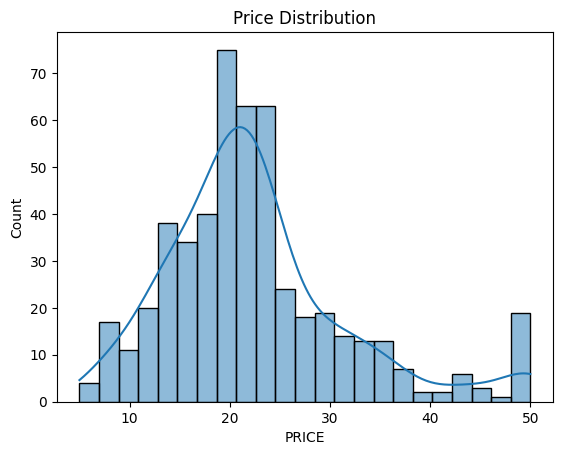

In [5]:
# Step 3: Data Preprocessing - Check for missing values and statistics
print(df.isnull().sum())
print(df.describe())

# Price distribution
sns.histplot(df['PRICE'], kde=True)
plt.title('Price Distribution')
plt.show()

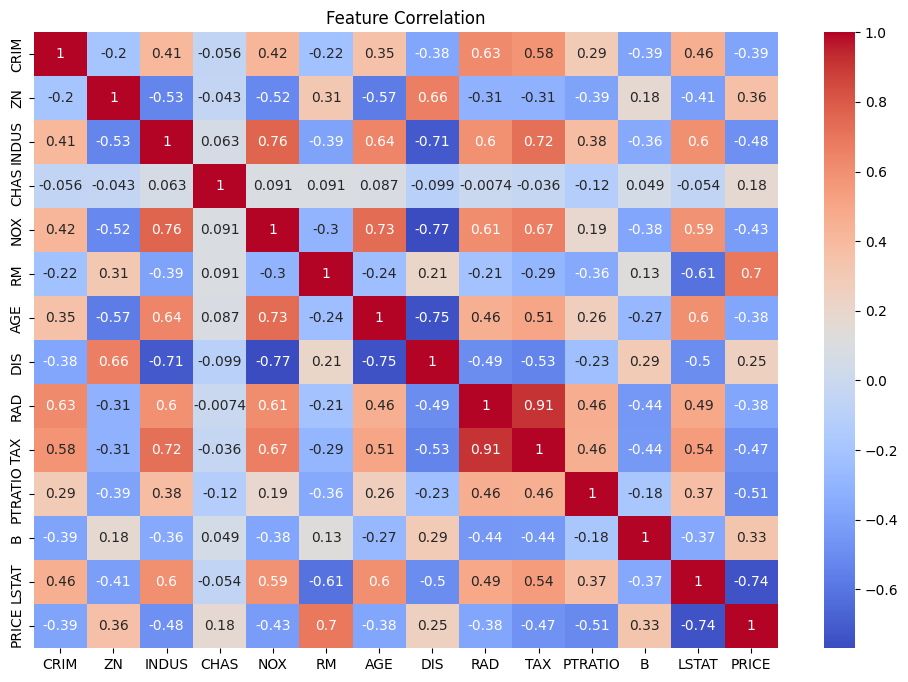

In [6]:
# Step 4: Correlation Matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation')
plt.show()

In [7]:
# Step 5: Train-Test Split
X = df.drop('PRICE', axis=1)
y = df['PRICE']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Step 6: Train Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [9]:
# Step 7: Evaluate Linear Regression
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Linear Regression MSE:", mse)
print("Linear Regression R²:", r2)

Linear Regression MSE: 24.291119474973478
Linear Regression R²: 0.6687594935356326


In [10]:
# Step 8: Try Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)
tree_pred = tree_model.predict(X_test)
print("Decision Tree MSE:", mean_squared_error(y_test, tree_pred))
print("Decision Tree R²:", r2_score(y_test, tree_pred))

Decision Tree MSE: 10.416078431372549
Decision Tree R²: 0.8579634380978161


In [11]:
# Step 9: Try Gradient Boosting Regressor
from sklearn.ensemble import GradientBoostingRegressor
gb_model = GradientBoostingRegressor()
gb_model.fit(X_train, y_train)
gb_pred = gb_model.predict(X_test)
print("Gradient Boosting MSE:", mean_squared_error(y_test, gb_pred))
print("Gradient Boosting R²:", r2_score(y_test, gb_pred))

Gradient Boosting MSE: 6.110694678867674
Gradient Boosting R²: 0.9166728564172338
